# Car accident

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import datetime
import os

if not os.path.exists('Graphen'):
    os.mkdir('Graphen')
if not os.path.exists('Daten'):
    os.mkdir('Daten')

In [22]:
try:
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding='WINDOWS-1252')
except:
    with open('FARS2021NationalCSV/accident.csv', 'rb') as f:
        result = chardet.detect(f.read())  # or readline if the file is large
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding=result)
    print(result)


try:
    people = pd.read_csv('Daten/people.csv',index_col=0)
except:
    people = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/co-est2021-alldata.csv',encoding='ISO-8859-10')
    people.to_csv('Daten/people.csv')
    
try:
    Google_daten = pd.read_csv('Daten/Google_daten(US).csv',parse_dates=['date'],index_col=0)
except:
    Google_daten = pd.read_csv('https://storage.googleapis.com/covid19-open-data/v2/main.csv',skiprows=range(1,14096993),nrows=2368485,parse_dates=['date'])
    Google_daten.to_csv('Daten/Google_daten(US).csv')
    


print(accidents_state)

print(people[people['CTYNAME'].isin(people['STNAME'])][['STATE','CTYNAME','POPESTIMATE2021']].groupby('STATE').first())
print(accidents.columns)
print(accidents)

/tmp/ipykernel_15273/974180889.py:17: DtypeWarning: Columns (12,13,103) have mixed types. Specify dtype option on import or set low_memory=False.
  Google_daten = pd.read_csv('Daten/Google_daten(US).csv',parse_dates=['date'])


         Unnamed: 0          key       date                     place_id  \
367             367           US 2021-01-02  ChIJCzYy5IS16lQRQrfeQ5K5Oxw   
368             368           US 2021-01-03  ChIJCzYy5IS16lQRQrfeQ5K5Oxw   
369             369           US 2021-01-04  ChIJCzYy5IS16lQRQrfeQ5K5Oxw   
370             370           US 2021-01-05  ChIJCzYy5IS16lQRQrfeQ5K5Oxw   
371             371           US 2021-01-06  ChIJCzYy5IS16lQRQrfeQ5K5Oxw   
...             ...          ...        ...                          ...   
2368480     2368480  US_WY_56045 2021-12-17  ChIJd4Rqhed3YocR7ubT5-HgoJg   
2368481     2368481  US_WY_56045 2021-12-18  ChIJd4Rqhed3YocR7ubT5-HgoJg   
2368482     2368482  US_WY_56045 2021-12-19  ChIJd4Rqhed3YocR7ubT5-HgoJg   
2368483     2368483  US_WY_56045 2021-12-20  ChIJd4Rqhed3YocR7ubT5-HgoJg   
2368484     2368484  US_WY_56045 2021-12-21  ChIJd4Rqhed3YocR7ubT5-HgoJg   

        wikidata  datacommons country_code              country_name  \
367          Q3

In [43]:
accidents_state = accidents.value_counts('STATE',sort=False).to_frame()
accidents_state['CASES'] = accidents_state['count']
del accidents_state['count']
accidents_state['STATENAME'] = accidents['STATENAME'].unique()
accidents_state['Population'] = Google_daten[Google_daten['date']>'2021'].groupby('subregion1_name').first()['population'][accidents['STATENAME'].unique()].to_numpy()

accidents_state['POPULATION_2021'] = people[people['CTYNAME'].isin(people['STNAME'])].groupby('STATE').first()['POPESTIMATE2021']
accidents_state['CASES_NORM'] = accidents_state['CASES']/accidents_state['Population']
accidents_state['CASES/100000'] = accidents_state['CASES_NORM']*100000

print(accidents_state)

       CASES             STATENAME  Population  POPULATION_2021  CASES_NORM  \
STATE                                                                         
1        885               Alabama     4858979          5039877    0.000182   
2         59                Alaska      738432           732673    0.000080   
4       1063               Arizona     6828065          7276316    0.000156   
5        631              Arkansas     2978204          3025891    0.000212   
6       3983            California    39144818         39237836    0.000102   
8        638              Colorado     5456574          5812069    0.000117   
9        283           Connecticut     3590886          3605597    0.000079   
10       132              Delaware      945934          1003384    0.000140   
11        40  District of Columbia      705749           670050    0.000057   
12      3451               Florida    20271272         21781128    0.000170   
13      1670               Georgia    10214860      

## List cases

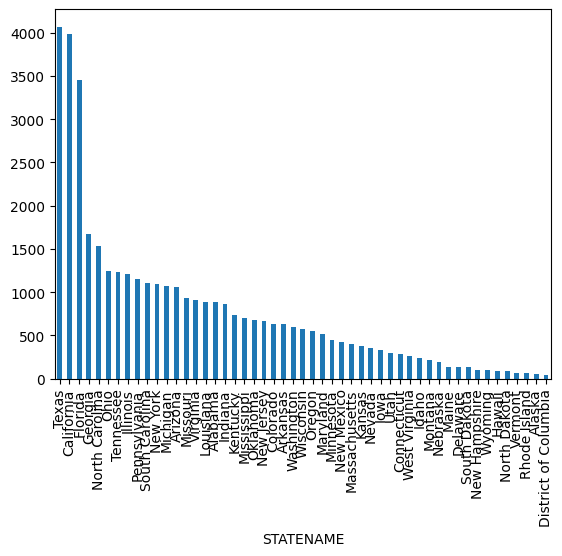

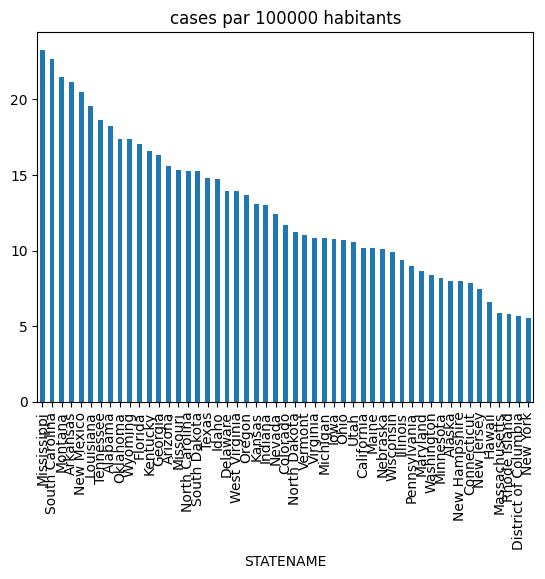

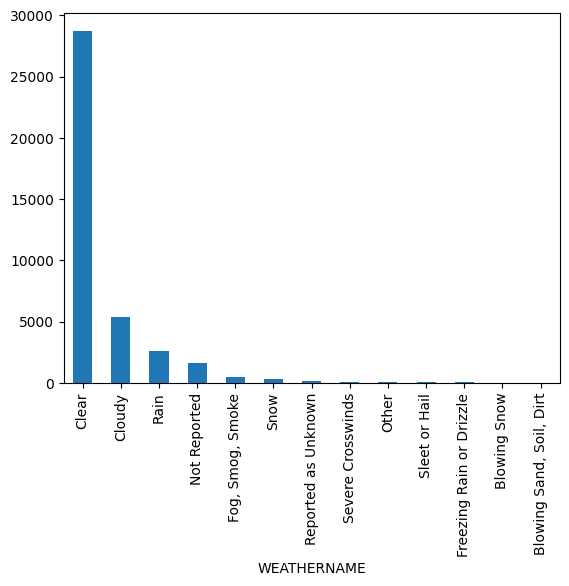

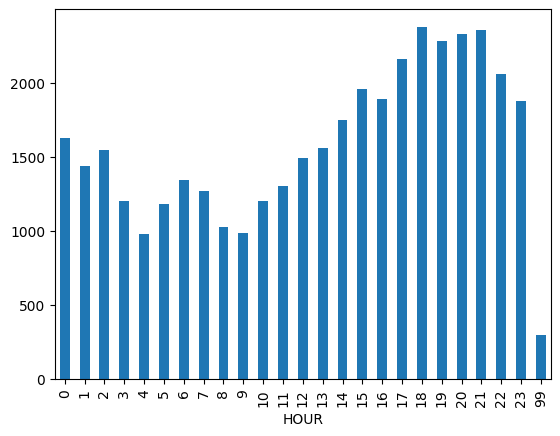

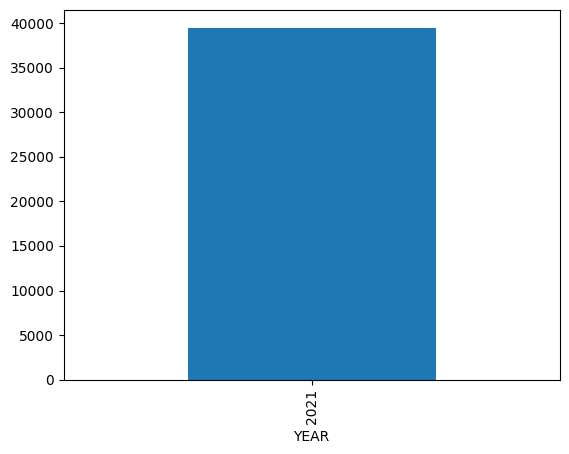

In [35]:


plt.figure()
accidents['STATENAME'].value_counts().plot.bar()
plt.show()

plt.figure()
plt.title('cases par 100000 habitants')
accidents_state.set_index('STATENAME')['CASES/100000'].sort_values(ascending=False).plot.bar()
plt.show()

plt.figure()
accidents['WEATHERNAME'].value_counts().plot.bar()
plt.show()

plt.figure()
accidents['HOUR'].value_counts().sort_index().plot.bar()
plt.show()

plt.figure()
accidents['YEAR'].value_counts().sort_index().plot.bar()
plt.show()